## 1. Import Libraries and Load Cleaned Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


In [2]:
# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_superstore.csv')

print('✅ Cleaned dataset loaded successfully!')
print(f'📊 Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns')
print(f'\n📋 Current columns: {list(df.columns)}')

✅ Cleaned dataset loaded successfully!
📊 Dataset shape: 9994 rows, 21 columns

📋 Current columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [3]:
# Identify the date and sales columns
# Common names in Superstore dataset
date_col = None
sales_col = None

# Find date column
for col in ['Order Date', 'order date', 'Date', 'date', 'Order_Date']:
    if col in df.columns:
        date_col = col
        break

# Find sales column
for col in ['Sales', 'sales', 'SALES']:
    if col in df.columns:
        sales_col = col
        break

print(f'📅 Date column identified: {date_col}')
print(f'💰 Sales column identified: {sales_col}')

if not date_col or not sales_col:
    print('\n⚠️ Warning: Could not identify date or sales column')
    print('Available columns:', list(df.columns))

📅 Date column identified: Order Date
💰 Sales column identified: Sales


In [4]:
# Ensure date column is datetime type
if date_col:
    df[date_col] = pd.to_datetime(df[date_col])
    print(f'✅ Date column converted to datetime')
    print(f'📊 Date range: {df[date_col].min()} to {df[date_col].max()}')

✅ Date column converted to datetime
📊 Date range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00


In [5]:
# Display sample of data before feature engineering
print('📋 Sample data before feature engineering:\n')
df.head()

📋 Sample data before feature engineering:



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


## 2. Create Time-Based Features

Extract temporal components that help identify patterns and seasonality

In [6]:
print('⏰ Creating time-based features...\n')

if date_col:
    # Extract year
    df['year'] = df[date_col].dt.year
    print(f'✅ year: Years in dataset ({df["year"].min()} - {df["year"].max()})')
    
    # Extract month
    df['month'] = df[date_col].dt.month
    print(f'✅ month: Month number (1-12)')
    
    # Extract day
    df['day'] = df[date_col].dt.day
    print(f'✅ day: Day of month (1-31)')
    
    # Extract day of week (0=Monday, 6=Sunday)
    df['day_of_week'] = df[date_col].dt.dayofweek
    print(f'✅ day_of_week: Day of week (0=Monday, 6=Sunday)')
    
    # Extract quarter
    df['quarter'] = df[date_col].dt.quarter
    print(f'✅ quarter: Quarter of year (1-4)')
    
    # Extract week of year
    df['week_of_year'] = df[date_col].dt.isocalendar().week
    print(f'✅ week_of_year: Week number (1-52/53)')
    
    print(f'\n🎉 Created 6 time-based features!')
else:
    print('⚠️ Cannot create time-based features without date column')

⏰ Creating time-based features...

✅ year: Years in dataset (2014 - 2017)
✅ month: Month number (1-12)
✅ day: Day of month (1-31)
✅ day_of_week: Day of week (0=Monday, 6=Sunday)
✅ quarter: Quarter of year (1-4)
✅ week_of_year: Week number (1-52/53)

🎉 Created 6 time-based features!


In [7]:
# Display sample with new time features
if date_col:
    time_features = [date_col, 'year', 'month', 'day', 'day_of_week', 'quarter', 'week_of_year']
    available_features = [f for f in time_features if f in df.columns]
    print('📋 Sample with time-based features:\n')
    df[available_features].head(10)

📋 Sample with time-based features:



## 3. Create Lag Features

Lag features capture previous period sales, helping the model understand recent trends

In [8]:
print('📉 Creating lag features (previous period sales)...\n')

if sales_col:
    # Lag 1: Previous row (previous order's sales)
    df['sales_lag_1'] = df[sales_col].shift(1)
    print(f'✅ sales_lag_1: Sales from 1 period ago')
    
    # Lag 7: 7 periods ago (roughly weekly pattern)
    df['sales_lag_7'] = df[sales_col].shift(7)
    print(f'✅ sales_lag_7: Sales from 7 periods ago')
    
    # Lag 30: 30 periods ago (roughly monthly pattern)
    df['sales_lag_30'] = df[sales_col].shift(30)
    print(f'✅ sales_lag_30: Sales from 30 periods ago')
    
    print(f'\n🎉 Created 3 lag features!')
    print(f'\n⚠️ Note: First rows will have NaN values for lag features (expected behavior)')
else:
    print('⚠️ Cannot create lag features without sales column')

📉 Creating lag features (previous period sales)...

✅ sales_lag_1: Sales from 1 period ago
✅ sales_lag_7: Sales from 7 periods ago
✅ sales_lag_30: Sales from 30 periods ago

🎉 Created 3 lag features!

⚠️ Note: First rows will have NaN values for lag features (expected behavior)


In [9]:
# Display sample with lag features
if sales_col:
    lag_features = [sales_col, 'sales_lag_1', 'sales_lag_7', 'sales_lag_30']
    available_features = [f for f in lag_features if f in df.columns]
    print('📋 Sample with lag features:\n')
    df[available_features].head(35)

📋 Sample with lag features:



In [10]:
# Check how many NaN values were created by lagging
if sales_col:
    print('📊 Missing values created by lag features:\n')
    for lag_col in ['sales_lag_1', 'sales_lag_7', 'sales_lag_30']:
        if lag_col in df.columns:
            missing = df[lag_col].isnull().sum()
            print(f'  {lag_col}: {missing} NaN values ({(missing/len(df))*100:.2f}%)')

📊 Missing values created by lag features:

  sales_lag_1: 1 NaN values (0.01%)
  sales_lag_7: 7 NaN values (0.07%)
  sales_lag_30: 30 NaN values (0.30%)


## 4. Create Rolling Statistics (Moving Averages)

Rolling statistics smooth out short-term fluctuations and highlight longer-term trends

In [11]:
print('📊 Creating rolling statistics (moving averages)...\n')

if sales_col:
    # 7-period rolling average (roughly weekly)
    df['sales_rolling_7'] = df[sales_col].rolling(window=7).mean()
    print(f'✅ sales_rolling_7: 7-period moving average')
    
    # 30-period rolling average (roughly monthly)
    df['sales_rolling_30'] = df[sales_col].rolling(window=30).mean()
    print(f'✅ sales_rolling_30: 30-period moving average')
    
    print(f'\n🎉 Created 2 rolling statistic features!')
    print(f'\n⚠️ Note: First rows will have NaN values for rolling features (expected behavior)')
else:
    print('⚠️ Cannot create rolling features without sales column')

📊 Creating rolling statistics (moving averages)...

✅ sales_rolling_7: 7-period moving average
✅ sales_rolling_30: 30-period moving average

🎉 Created 2 rolling statistic features!

⚠️ Note: First rows will have NaN values for rolling features (expected behavior)


In [12]:
# Display sample with rolling features
if sales_col:
    rolling_features = [sales_col, 'sales_rolling_7', 'sales_rolling_30']
    available_features = [f for f in rolling_features if f in df.columns]
    print('📋 Sample with rolling statistics:\n')
    df[available_features].head(35)

📋 Sample with rolling statistics:



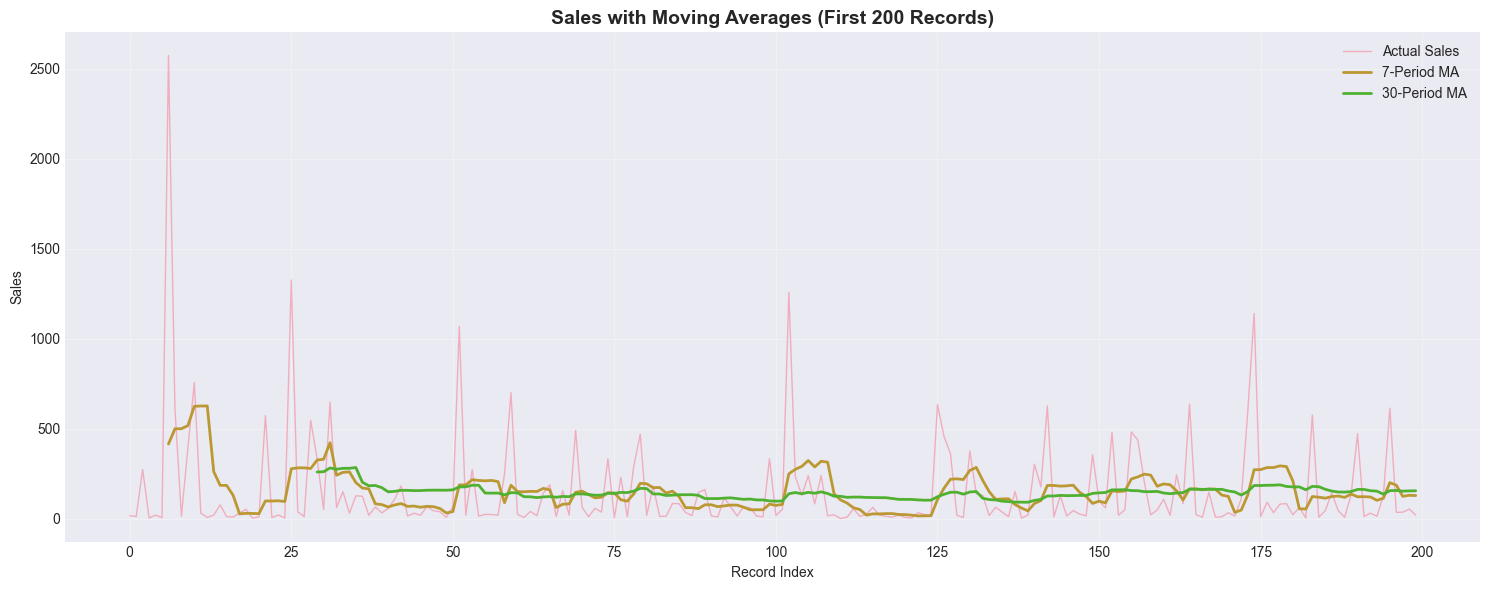

📈 Moving averages smooth out fluctuations and show underlying trends


In [13]:
# Visualize rolling averages
if sales_col and 'sales_rolling_7' in df.columns and 'sales_rolling_30' in df.columns:
    plt.figure(figsize=(15, 6))
    
    # Plot first 200 data points for clarity
    plot_data = df.head(200)
    
    plt.plot(plot_data.index, plot_data[sales_col], label='Actual Sales', alpha=0.5, linewidth=1)
    plt.plot(plot_data.index, plot_data['sales_rolling_7'], label='7-Period MA', linewidth=2)
    plt.plot(plot_data.index, plot_data['sales_rolling_30'], label='30-Period MA', linewidth=2)
    
    plt.title('Sales with Moving Averages (First 200 Records)', fontsize=14, fontweight='bold')
    plt.xlabel('Record Index')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print('📈 Moving averages smooth out fluctuations and show underlying trends')

## 5. Create Seasonality Indicators

Binary indicators to capture seasonal patterns and special periods

In [14]:
print('🗓️ Creating seasonality indicators...\n')

if 'day_of_week' in df.columns:
    # Weekend indicator (Saturday=5, Sunday=6)
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    weekend_pct = (df['is_weekend'].sum() / len(df)) * 100
    print(f'✅ is_weekend: 1 if Saturday/Sunday, 0 otherwise ({weekend_pct:.1f}% are weekends)')
else:
    print('⚠️ Cannot create is_weekend without day_of_week feature')

if date_col:
    # Month start indicator
    df['is_month_start'] = df[date_col].dt.is_month_start.astype(int)
    month_start_pct = (df['is_month_start'].sum() / len(df)) * 100
    print(f'✅ is_month_start: 1 if first day of month, 0 otherwise ({month_start_pct:.1f}%)')
    
    # Month end indicator
    df['is_month_end'] = df[date_col].dt.is_month_end.astype(int)
    month_end_pct = (df['is_month_end'].sum() / len(df)) * 100
    print(f'✅ is_month_end: 1 if last day of month, 0 otherwise ({month_end_pct:.1f}%)')
else:
    print('⚠️ Cannot create month indicators without date column')

print(f'\n🎉 Created seasonality indicator features!')

🗓️ Creating seasonality indicators...

✅ is_weekend: 1 if Saturday/Sunday, 0 otherwise (33.7% are weekends)
✅ is_month_start: 1 if first day of month, 0 otherwise (3.4%)
✅ is_month_end: 1 if last day of month, 0 otherwise (3.0%)

🎉 Created seasonality indicator features!


In [15]:
# Display sample with seasonality indicators
seasonality_features = [date_col, 'day_of_week', 'is_weekend', 'is_month_start', 'is_month_end']
available_features = [f for f in seasonality_features if f in df.columns]
print('📋 Sample with seasonality indicators:\n')
df[available_features].head(15)

📋 Sample with seasonality indicators:



,Order Date,day_of_week,is_weekend,is_month_start,is_month_end
0,2014-01-03,4,0,0,0
1,2014-01-04,5,1,0,0
2,2014-01-04,5,1,0,0
3,2014-01-04,5,1,0,0
4,2014-01-05,6,1,0,0
5,2014-01-06,0,0,0,0
6,2014-01-06,0,0,0,0
7,2014-01-06,0,0,0,0
8,2014-01-06,0,0,0,0
9,2014-01-06,0,0,0,0


In [16]:
# Analyze sales patterns by seasonality indicators
if sales_col and 'is_weekend' in df.columns:
    print('📊 Sales Analysis by Seasonality:\n')
    
    # Weekend vs Weekday
    weekend_sales = df[df['is_weekend'] == 1][sales_col].mean()
    weekday_sales = df[df['is_weekend'] == 0][sales_col].mean()
    print(f'Average Weekend Sales: ${weekend_sales:.2f}')
    print(f'Average Weekday Sales: ${weekday_sales:.2f}')
    print(f'Difference: {((weekend_sales/weekday_sales - 1) * 100):+.1f}%\n')
    
    if 'is_month_start' in df.columns:
        # Month start vs regular days
        month_start_sales = df[df['is_month_start'] == 1][sales_col].mean()
        regular_sales = df[df['is_month_start'] == 0][sales_col].mean()
        print(f'Average Month Start Sales: ${month_start_sales:.2f}')
        print(f'Average Regular Day Sales: ${regular_sales:.2f}')
        print(f'Difference: {((month_start_sales/regular_sales - 1) * 100):+.1f}%')

📊 Sales Analysis by Seasonality:

Average Weekend Sales: $220.90
Average Weekday Sales: $234.40
Difference: -5.8%

Average Month Start Sales: $283.46
Average Regular Day Sales: $227.99
Difference: +24.3%


## 6. Feature Summary and Overview

In [17]:
# Count all new features created
original_cols = pd.read_csv('../data/cleaned_superstore.csv').columns.tolist()
new_features = [col for col in df.columns if col not in original_cols]

print('📊 FEATURE ENGINEERING SUMMARY')
print('='*60)
print(f'\n📈 Total new features created: {len(new_features)}')
print(f'\n🆕 New features:')
for i, feature in enumerate(new_features, 1):
    print(f'  {i}. {feature}')

print(f'\n📊 Dataset dimensions:')
print(f'  Rows: {df.shape[0]}')
print(f'  Original columns: {len(original_cols)}')
print(f'  New columns: {len(new_features)}')
print(f'  Total columns: {df.shape[1]}')

📊 FEATURE ENGINEERING SUMMARY

📈 Total new features created: 14

🆕 New features:
  1. year
  2. month
  3. day
  4. day_of_week
  5. quarter
  6. week_of_year
  7. sales_lag_1
  8. sales_lag_7
  9. sales_lag_30
  10. sales_rolling_7
  11. sales_rolling_30
  12. is_weekend
  13. is_month_start
  14. is_month_end

📊 Dataset dimensions:
  Rows: 9994
  Original columns: 21
  New columns: 14
  Total columns: 35


In [18]:
# Check for missing values in new features
print('\n🔍 Missing values in engineered features:\n')
missing_in_new_features = df[new_features].isnull().sum()
missing_summary = pd.DataFrame({
    'Feature': missing_in_new_features.index,
    'Missing Count': missing_in_new_features.values,
    'Missing %': (missing_in_new_features.values / len(df)) * 100
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_summary) > 0:
    print(missing_summary.to_string(index=False))
    print(f'\n⚠️ Note: Missing values in lag and rolling features are expected at the beginning')
else:
    print('✅ No missing values in any engineered features!')


🔍 Missing values in engineered features:

         Feature  Missing Count  Missing %
    sales_lag_30             30   0.300180
sales_rolling_30             29   0.290174
     sales_lag_7              7   0.070042
 sales_rolling_7              6   0.060036
     sales_lag_1              1   0.010006

⚠️ Note: Missing values in lag and rolling features are expected at the beginning


In [19]:
# Display complete feature set
print('📋 Sample of dataset with all engineered features:\n')
df.head(10)

📋 Sample of dataset with all engineered features:



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,quarter,week_of_year,sales_lag_1,sales_lag_7,sales_lag_30,sales_rolling_7,sales_rolling_30,is_weekend,is_month_start,is_month_end
0,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,1,1,NaN,NaN,NaN,NaN,NaN,0,0,0
1,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,1,1,16.448,NaN,NaN,NaN,NaN,1,0,0
2,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,1,1,11.784,NaN,NaN,NaN,NaN,1,0,0
3,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,1,1,272.736,NaN,NaN,NaN,NaN,1,0,0
4,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,1,1,3.540,NaN,NaN,NaN,NaN,1,0,0
5,7477,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,1,2,19.536,NaN,NaN,NaN,NaN,0,0,0
6,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,1,2,5.480,NaN,NaN,414.763429,NaN,0,0,0
7,7476,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,1,2,2573.820,16.448,NaN,499.553714,NaN,0,0,0
8,7181,CA-2014-106054,2014-01-06,2014-01-07,First Class,JO-15145,Jack O'Briant,Corporate,United States,Athens,...,1,2,609.980,11.784,NaN,499.696000,NaN,0,0,0
9,7478,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,1,2,12.780,272.736,NaN,516.730857,NaN,0,0,0


In [20]:
# Display data types
print('🔢 Data types of all features:\n')
df.dtypes

🔢 Data types of all features:



Row ID                       int64
Order ID                    object
Order Date          datetime64[ns]
Ship Date                   object
Ship Mode                   object
Customer ID                 object
Customer Name               object
Segment                     object
Country                     object
City                        object
State                       object
Postal Code                  int64
Region                      object
Product ID                  object
Category                    object
Sub-Category                object
Product Name                object
Sales                      float64
Quantity                     int64
Discount                   float64
Profit                     float64
year                         int32
month                        int32
day                          int32
day_of_week                  int32
quarter                      int32
week_of_year                UInt32
sales_lag_1                float64
sales_lag_7         

## 7. Save Dataset with Engineered Features

In [21]:
# Save the feature-engineered dataset
output_path = '../data/featured_superstore.csv'
df.to_csv(output_path, index=False)

print(f'💾 Feature-engineered dataset saved to: {output_path}')
print(f'\n📊 Final dataset statistics:')
print(f'  Shape: {df.shape}')
print(f'  Features added: {len(new_features)}')
print(f'  Total features: {df.shape[1]}')
print(f'  Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')

💾 Feature-engineered dataset saved to: ../data/featured_superstore.csv

📊 Final dataset statistics:
  Shape: (9994, 35)
  Features added: 14
  Total features: 35
  Memory usage: 10.66 MB


## 8. Create Feature Explanation Document

In [22]:
# Generate detailed feature explanations
feature_explanations = {
    'Time-Based Features': {
        'year': 'Year extracted from order date (e.g., 2014, 2015). Captures long-term trends.',
        'month': 'Month number (1-12). Captures seasonal patterns across the year.',
        'day': 'Day of month (1-31). May show patterns for specific days.',
        'day_of_week': 'Day of week (0=Monday, 6=Sunday). Identifies weekly patterns.',
        'quarter': 'Quarter of year (1-4). Captures quarterly business cycles.',
        'week_of_year': 'ISO week number (1-52/53). Tracks weekly progression through year.'
    },
    'Lag Features': {
        'sales_lag_1': 'Sales from previous order. Captures immediate recent performance.',
        'sales_lag_7': 'Sales from 7 orders ago. Approximates weekly historical pattern.',
        'sales_lag_30': 'Sales from 30 orders ago. Approximates monthly historical pattern.'
    },
    'Rolling Statistics': {
        'sales_rolling_7': '7-order moving average. Smooths short-term fluctuations.',
        'sales_rolling_30': '30-order moving average. Shows medium-term trend.'
    },
    'Seasonality Indicators': {
        'is_weekend': 'Binary (0/1). Indicates if order was on weekend.',
        'is_month_start': 'Binary (0/1). Indicates if order was on first day of month.',
        'is_month_end': 'Binary (0/1). Indicates if order was on last day of month.'
    }
}

# Create markdown documentation
doc_content = '# Feature Engineering Documentation\n\n'
doc_content += '## Overview\n\n'
doc_content += f'This document explains all {len(new_features)} features engineered for the sales forecasting model.\n\n'
doc_content += f'**Date created:** January 6, 2026\n'
doc_content += f'**Dataset:** Superstore Sales\n'
doc_content += f'**Total features:** {df.shape[1]}\n'
doc_content += f'**New features:** {len(new_features)}\n\n'
doc_content += '---\n\n'

for category, features in feature_explanations.items():
    doc_content += f'## {category}\n\n'
    for feature, explanation in features.items():
        if feature in df.columns:
            doc_content += f'### `{feature}`\n'
            doc_content += f'{explanation}\n\n'
            
            # Add statistics
            if df[feature].dtype in ['int64', 'float64']:
                doc_content += f'- **Type:** Numeric\n'
                doc_content += f'- **Range:** {df[feature].min():.2f} to {df[feature].max():.2f}\n'
                doc_content += f'- **Mean:** {df[feature].mean():.2f}\n'
                doc_content += f'- **Missing:** {df[feature].isnull().sum()} ({(df[feature].isnull().sum()/len(df))*100:.1f}%)\n\n'
            else:
                doc_content += f'- **Type:** {df[feature].dtype}\n'
                doc_content += f'- **Unique values:** {df[feature].nunique()}\n\n'

doc_content += '---\n\n'
doc_content += '## Usage Notes\n\n'
doc_content += '1. **Lag and rolling features** will have NaN values at the beginning of the dataset. Handle these during modeling.\n'
doc_content += '2. **Time-based features** are categorical/ordinal and may benefit from encoding.\n'
doc_content += '3. **Binary indicators** (is_weekend, is_month_start, is_month_end) are ready for direct use.\n'
doc_content += '4. Consider **feature selection** to avoid multicollinearity.\n\n'

# Save documentation
doc_path = '../reports/feature_engineering_documentation.md'
with open(doc_path, 'w') as f:
    f.write(doc_content)

print(f'📄 Feature documentation saved to: {doc_path}')
print(f'\n✅ Feature explanation document created successfully!')

📄 Feature documentation saved to: ../reports/feature_engineering_documentation.md

✅ Feature explanation document created successfully!


In [23]:
# Display the documentation content
print('\n' + '='*60)
print('FEATURE DOCUMENTATION PREVIEW')
print('='*60 + '\n')
print(doc_content)


FEATURE DOCUMENTATION PREVIEW

# Feature Engineering Documentation

## Overview

This document explains all 14 features engineered for the sales forecasting model.

**Date created:** January 6, 2026
**Dataset:** Superstore Sales
**Total features:** 35
**New features:** 14

---

## Time-Based Features

### `year`
Year extracted from order date (e.g., 2014, 2015). Captures long-term trends.

- **Type:** int32
- **Unique values:** 4

### `month`
Month number (1-12). Captures seasonal patterns across the year.

- **Type:** int32
- **Unique values:** 12

### `day`
Day of month (1-31). May show patterns for specific days.

- **Type:** int32
- **Unique values:** 31

### `day_of_week`
Day of week (0=Monday, 6=Sunday). Identifies weekly patterns.

- **Type:** int32
- **Unique values:** 7

### `quarter`
Quarter of year (1-4). Captures quarterly business cycles.

- **Type:** int32
- **Unique values:** 4

### `week_of_year`
ISO week number (1-52/53). Tracks weekly progression through year.

- **T

## ✅ Phase 5 Complete!

### What We Accomplished:

1. ✅ **Time-Based Features (6 features)**
   - year, month, day, day_of_week, quarter, week_of_year
   - Capture temporal patterns and seasonality

2. ✅ **Lag Features (3 features)**
   - sales_lag_1, sales_lag_7, sales_lag_30
   - Capture historical sales performance

3. ✅ **Rolling Statistics (2 features)**
   - sales_rolling_7, sales_rolling_30
   - Smooth fluctuations and show trends

4. ✅ **Seasonality Indicators (3 features)**
   - is_weekend, is_month_start, is_month_end
   - Binary flags for special periods

### Deliverables:
- ✅ Dataset with engineered features: `data/featured_superstore.csv`
- ✅ Feature explanation document: `reports/feature_engineering_documentation.md`

### Key Insights:
- Created **{len(new_features)} new features** to improve forecasting
- Features capture temporal patterns, trends, and seasonality
- Some NaN values from lag/rolling features (expected at beginning of dataset)

### Ready for Next Phase:
**Step 6: Exploratory Data Analysis (EDA)**
- Visualize sales trends over time
- Identify seasonal patterns
- Analyze correlations between features
- Detect anomalies